<a href="https://colab.research.google.com/github/Tanveer132/Regression-Types-in-Machine-Learning/blob/main/Mini_Project_Linear_Regressio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <a id="homo">Statement : Does various predicting factors which has been chosen initially really affect the Life Expectancy? What are the predicting variables actually affecting the life expectancy?</a>

### <a id="homo">Load required Libraries</a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import seaborn as sns

### <a id="homo">Load libraries for Encoding</a>

In [ ]:
from sklearn.preprocessing import LabelEncoder

### <a id="homo">Load libraries for Scaling Features</a>

In [ ]:
from sklearn.preprocessing import MinMaxScaler

### <a id="homo">Load libraries for Normal Distribution</a>

In [ ]:
#pip install statsmodels

In [ ]:
from scipy.stats import norm
import statsmodels.api as sm
import pylab as py

### <a id="homo">Load libraries for Linear Regression</a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### <a id="homo">Load our Dataset</a>

In [ ]:
data = pd.read_csv("Life_Expectancy_Data.csv")

In [ ]:
data.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [ ]:
data.tail(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2928,Zimbabwe,2009,Developing,50.0,587.0,30,4.64,1.040021,73.0,853,...,69.0,6.26,73.0,18.1,65.824121,1381599.0,7.5,7.4,0.419,9.9
2929,Zimbabwe,2008,Developing,48.2,632.0,30,3.56,20.843429,75.0,0,...,75.0,4.96,75.0,20.5,325.678573,13558469.0,7.8,7.8,0.421,9.7
2930,Zimbabwe,2007,Developing,46.6,67.0,29,3.88,29.814566,72.0,242,...,73.0,4.47,73.0,23.7,396.998217,1332999.0,8.2,8.2,0.414,9.6
2931,Zimbabwe,2006,Developing,45.4,7.0,28,4.57,34.262169,68.0,212,...,71.0,5.12,7.0,26.8,414.796232,13124267.0,8.6,8.6,0.408,9.5
2932,Zimbabwe,2005,Developing,44.6,717.0,28,4.14,8.717409,65.0,420,...,69.0,6.44,68.0,30.3,444.765750,129432.0,9.0,9.0,0.406,9.3
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.000000,79.0,1483,...,78.0,7.10,78.0,43.5,547.358879,12222251.0,11.0,11.2,0.434,9.8


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [ ]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
data.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

### <a id="homo">Preprocessed Data</a>

###### 1. Data cleaning and Data wrangling
###### 2. Indentify and Handle missing values
###### 3. Data Formatting
###### 4. Data Normalization
###### 5. Data Bining
###### 6. Turning Categorical values to Numeric Variables

In [ ]:
# Dealing with Missing Values

data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


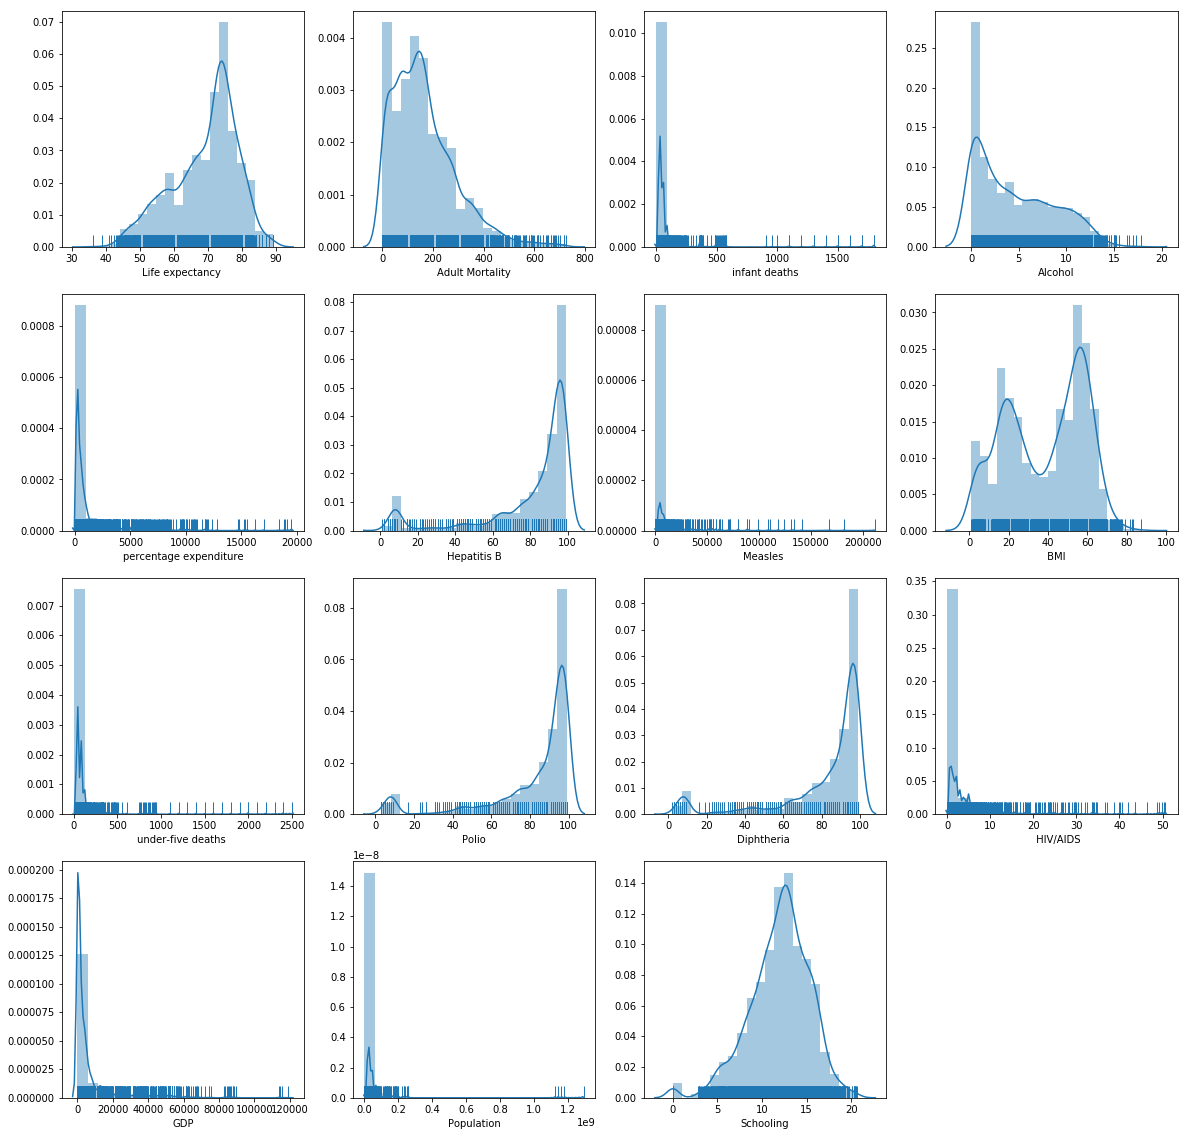

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(441)
sns.distplot(data["Life expectancy "], bins = 20, rug = True, kde = True)
plt.subplot(442)
sns.distplot(data["Adult Mortality"], bins = 20, rug = True, kde = True)
plt.subplot(443)
sns.distplot(data['infant deaths'], bins = 20, rug = True, kde = True)
plt.subplot(444)
sns.distplot(data['Alcohol'], bins = 20, rug = True, kde = True)
plt.subplot(445)
sns.distplot(data['percentage expenditure'], bins = 20, rug = True, kde = True)
plt.subplot(446)
sns.distplot(data['Hepatitis B'], bins = 20, rug = True, kde = True)
plt.subplot(447)
sns.distplot(data['Measles '], bins = 20, rug = True, kde = True)
plt.subplot(448)
sns.distplot(data[' BMI '], bins = 20, rug = True, kde = True)
plt.subplot(449)
sns.distplot(data['under-five deaths '], bins = 20, rug = True, kde = True)
plt.subplot(4,4,10)
sns.distplot(data['Polio'], bins = 20, rug = True, kde = True)
plt.subplot(4,4,11)
sns.distplot(data['Diphtheria '], bins = 20, rug = True, kde = True)
plt.subplot(4,4,12)
sns.distplot(data[' HIV/AIDS'], bins = 20, rug = True, kde = True)
plt.subplot(4,4,13)
sns.distplot(data['GDP'], bins = 20, rug = True, kde = True)
plt.subplot(4,4,14)
sns.distplot(data['Population'], bins = 20, rug = True, kde = True)
plt.subplot(4,4,15)
sns.distplot(data['Schooling'], bins = 20, rug = True, kde = True)
plt.show()

##### Conclusion : All columns with missing values were plotted. Total expenditure and schooling column are observed to be normal data. ramaining are behaving skewed in plot

##### Missing values are present in our data, so first we have to remove it or fill it (by using mean, median and mode, other techniques)

In [ ]:
data["Life expectancy "].fillna(data["Life expectancy "].mean(),inplace =True) #skewed data better to replace NaN values with the median values

data["Adult Mortality"].fillna(data["Adult Mortality"].median(),inplace =True) #skewed data better to replace NaN values with the median values

data["Alcohol"].fillna(data["Alcohol"].mean(),inplace =True) #skewed data better to replace NaN values with the median values 

data["Hepatitis B"].fillna(data["Hepatitis B"].mean(),inplace =True) #not skewed data better to replace NaN values with the mean values

data[" BMI "].fillna(data[" BMI "].mean(),inplace =True) #not really skewed data, eqally distributed better to replace NaN values with the mean values 

data["Polio"].fillna(data["Polio"].mean(),inplace =True) #not really skewed data, eqally distributed better to replace NaN values with the mean values 

data["Total expenditure"].fillna(data["Total expenditure"].mean(),inplace =True) #not really skewed data, eqally distributed better to replace NaN values with the mean values 

data["Diphtheria "].fillna(data["Diphtheria "].mean(),inplace =True) #not really skewed data, eqally distributed better to replace NaN values with the mean values 

data["GDP"].fillna(data["GDP"].median(),inplace =True) #skewed data better to replace NaN values with the median values 

data["Population"].fillna(data["Population"].median(),inplace =True) #skewed data better to replace NaN values with the median values 

data[" thinness  1-19 years"].fillna(data[" thinness  1-19 years"].mean(),inplace =True) #not really skewed data, eqally distributed better to replace NaN values with the mean values 

data[" thinness 5-9 years"].fillna(data[" thinness 5-9 years"].mean(),inplace =True) #not really skewed data, eqally distributed better to replace NaN values with the mean values 

data["Income composition of resources"].fillna(data["Income composition of resources"].mean(),inplace =True) #not really skewed data, eqally distributed better to replace NaN values with the mean values 

data["Schooling"].fillna(data["Schooling"].mean(),inplace =True) #not really skewed data, eqally distributed better to replace NaN values with the mean values 

data.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
# Encoding the Varibles

le=LabelEncoder()

data["code_Status"]=le.fit_transform(data["Status"])
print(data["code_Status"].head())

0    1
1    1
2    1
3    1
4    1
Name: code_Status, dtype: int32


In [ ]:
# Now we have to drop non numerical column, in our data set Country & Status is non numerical column

data = data.drop(columns = (["Country", "Status"]))
data.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,code_Status
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1


In [ ]:
# Check Outliers
data.shape

(2938, 21)

In [ ]:
#sns.boxplot("GDP", data = data)
#sns.boxplot("Population", data = data)
#plt.show()

In [ ]:
#Q1 = data.quantile(0.25)

#Q3 = data.quantile(0.75)

#IQR = Q3 - Q1

#print(IQR)

In [ ]:
#data = data[-((data<(Q1 - 1.5 * IQR)) | (data>(Q3 + 1.5 * IQR))).any(axis = 1)]

In [ ]:
#data.shape

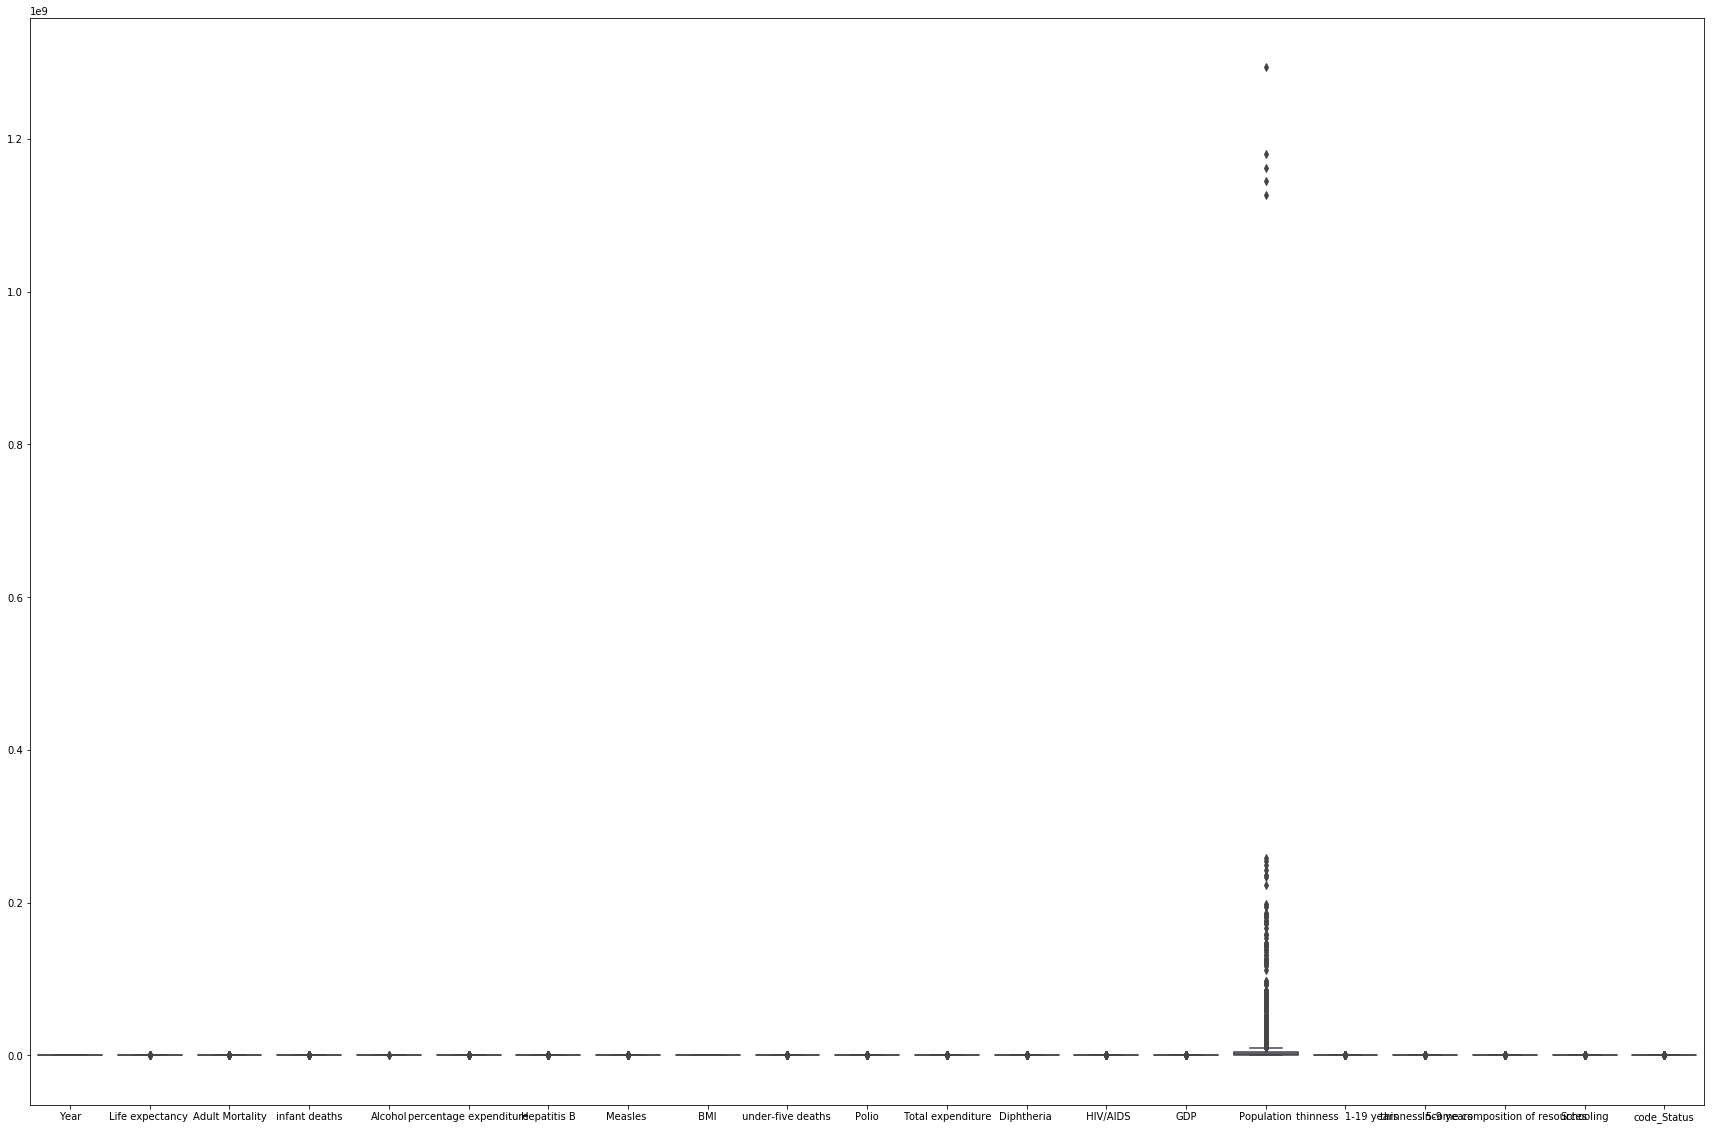

In [ ]:
# first we need to plot box plot for all the 
plt.figure(figsize=(30,20))
sns.boxplot(data=data)
plt.show()

In [ ]:
data.columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'code_Status'],
      dtype='object')

In [ ]:
# Data Normalization

m = MinMaxScaler()

m.fit(data)

norm_data = m.transform(data)

norm_data = pd.DataFrame(norm_data)
norm_data.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.000000,0.544592,0.362881,0.034444,0.0,0.003659,0.653061,0.005439,0.209733,0.0332,...,0.452118,0.649485,0.0,0.004889,0.026074,0.619565,0.603509,0.505274,0.487923,1.0
1,0.933333,0.447818,0.373961,0.035556,0.0,0.003774,0.622449,0.002319,0.203940,0.0344,...,0.453279,0.618557,0.0,0.005127,0.000253,0.630435,0.610526,0.502110,0.483092,1.0
2,0.866667,0.447818,0.369806,0.036667,0.0,0.003759,0.642857,0.002027,0.198146,0.0356,...,0.450377,0.639175,0.0,0.005287,0.024525,0.637681,0.617544,0.495781,0.478261,1.0
3,0.800000,0.440228,0.375346,0.038333,0.0,0.004014,0.673469,0.013135,0.192352,0.0372,...,0.473012,0.670103,0.0,0.005608,0.002857,0.644928,0.628070,0.488397,0.473430,1.0
4,0.733333,0.434535,0.379501,0.039444,0.0,0.000364,0.683673,0.014200,0.187717,0.0388,...,0.435287,0.680412,0.0,0.000519,0.002302,0.655797,0.635088,0.478903,0.458937,1.0


In [ ]:
norm_data.columns =['Year','Life_expectancy','Adult_Mortality','infant_deaths',
       'Alcohol','percentage_expenditure','Hepatitis_B','Measles','BMI',
       'under_five_deaths','Polio','Total_expenditure','Diphtheria',
       'HIV_AIDS','GDP','Population','thinness_1_19_years',
       'thinness_5_9_years','Income_composition_of_resources','Schooling',
       'code_Status']

norm_data.head()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,...,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,code_Status
0,1.000000,0.544592,0.362881,0.034444,0.0,0.003659,0.653061,0.005439,0.209733,0.0332,...,0.452118,0.649485,0.0,0.004889,0.026074,0.619565,0.603509,0.505274,0.487923,1.0
1,0.933333,0.447818,0.373961,0.035556,0.0,0.003774,0.622449,0.002319,0.203940,0.0344,...,0.453279,0.618557,0.0,0.005127,0.000253,0.630435,0.610526,0.502110,0.483092,1.0
2,0.866667,0.447818,0.369806,0.036667,0.0,0.003759,0.642857,0.002027,0.198146,0.0356,...,0.450377,0.639175,0.0,0.005287,0.024525,0.637681,0.617544,0.495781,0.478261,1.0
3,0.800000,0.440228,0.375346,0.038333,0.0,0.004014,0.673469,0.013135,0.192352,0.0372,...,0.473012,0.670103,0.0,0.005608,0.002857,0.644928,0.628070,0.488397,0.473430,1.0
4,0.733333,0.434535,0.379501,0.039444,0.0,0.000364,0.683673,0.014200,0.187717,0.0388,...,0.435287,0.680412,0.0,0.000519,0.002302,0.655797,0.635088,0.478903,0.458937,1.0


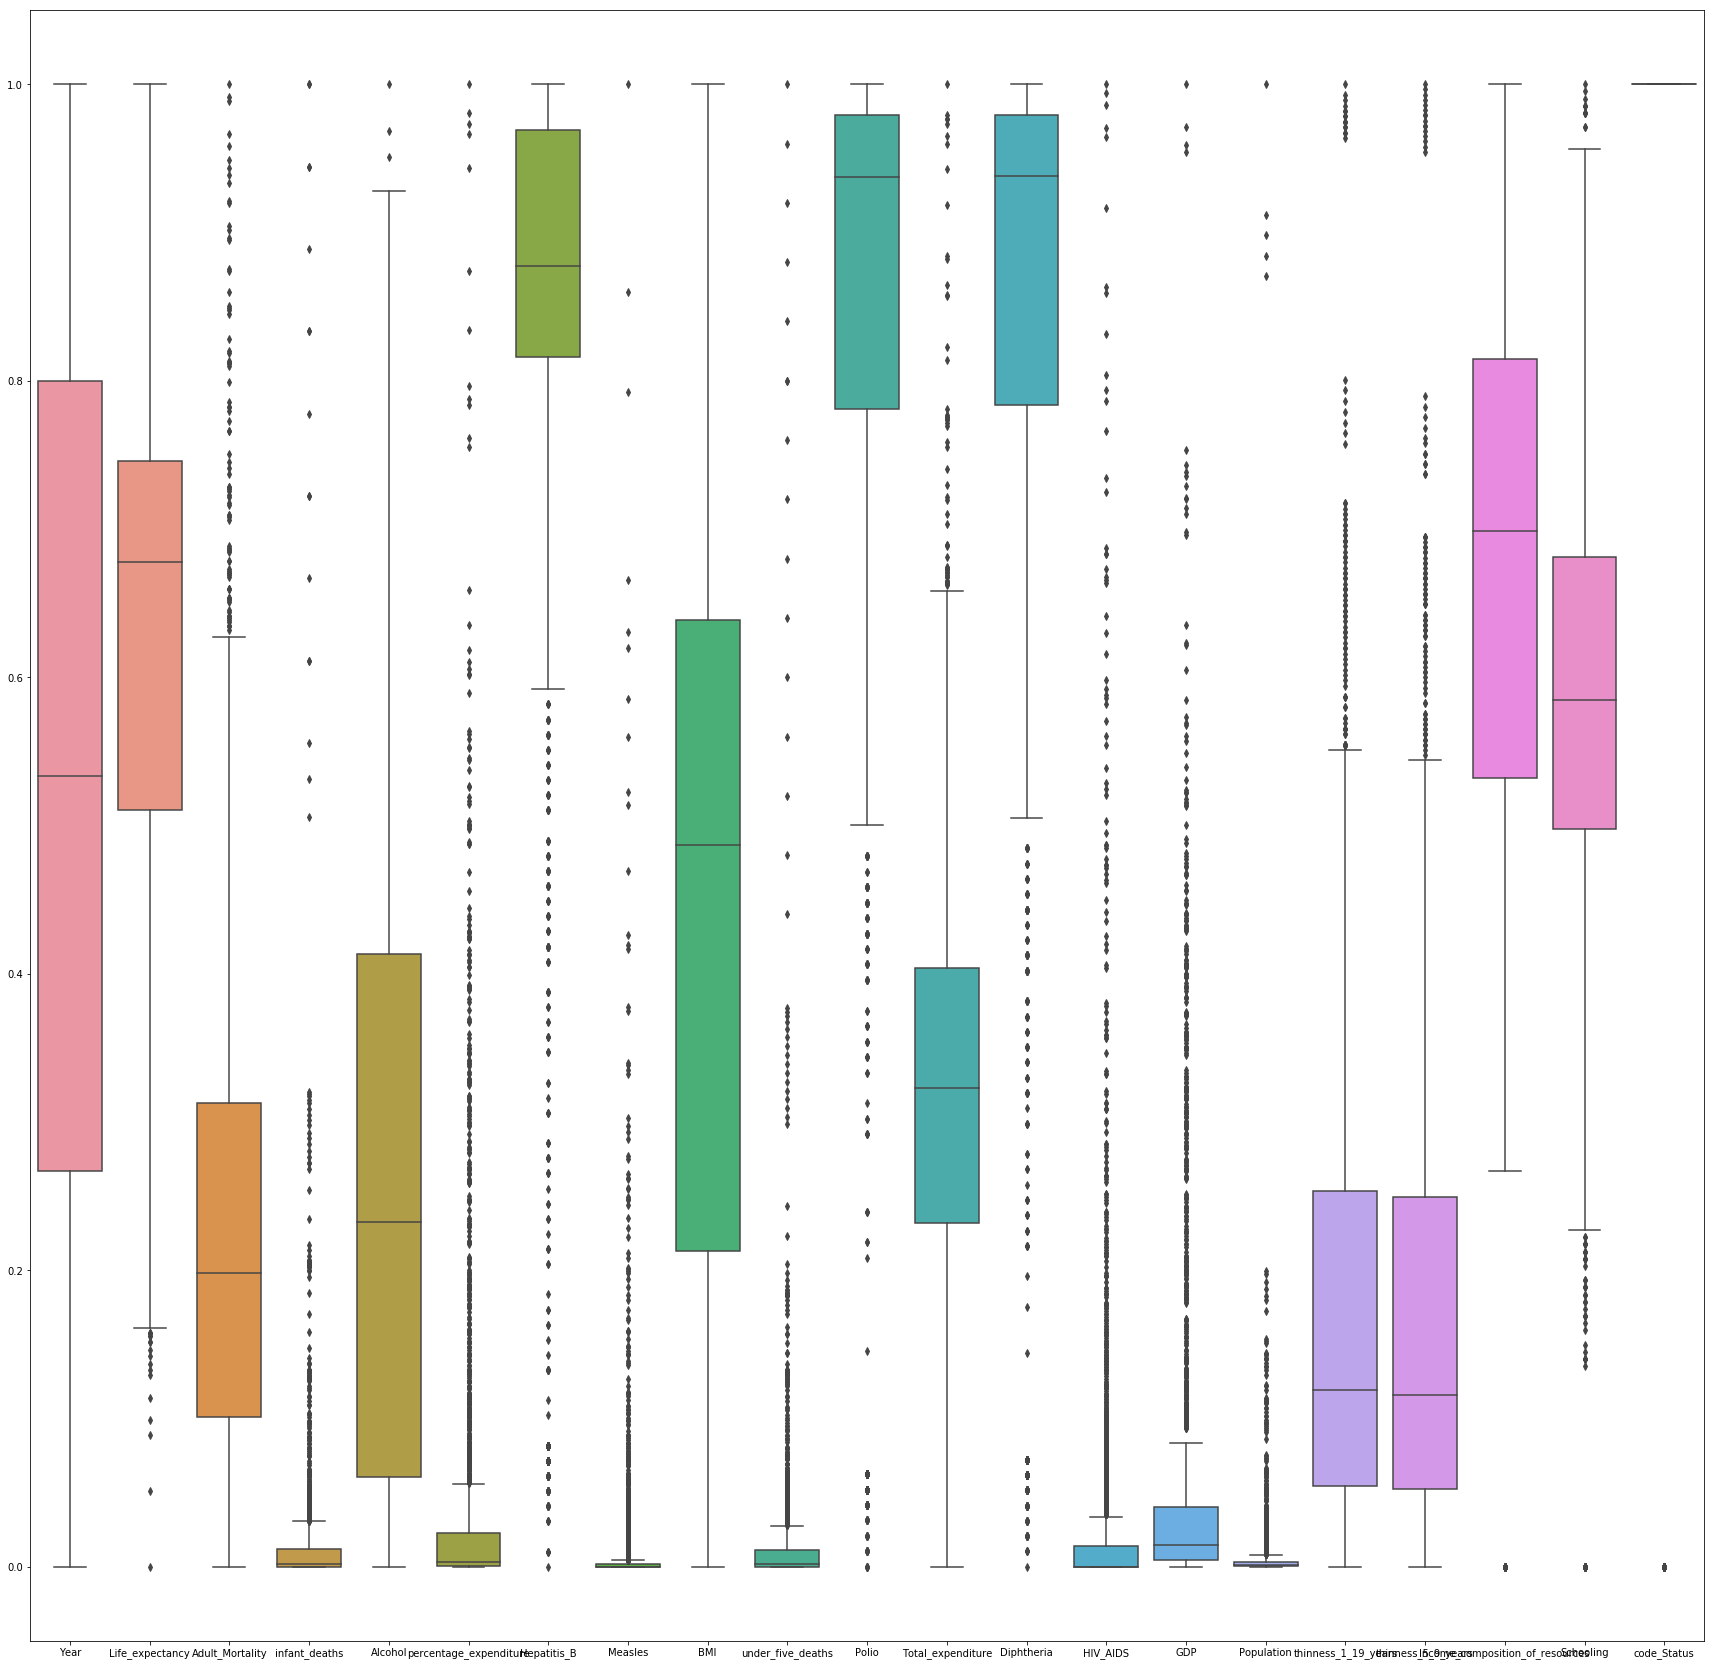

In [ ]:
plt.figure(figsize=(30,30))
sns.boxplot(data=norm_data)
plt.show()

### <a id="homo">Exploratory Data Analysis</a>

###### 1. Descriptive Statistics
###### 2. Group By
###### 3. Anova
###### 4. Correlation
###### 5. Correlation Statistics

In [ ]:
# Descriptive Statistics

norm_data.describe()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,...,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,code_Status
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,...,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,0.501248,0.624762,0.226767,0.016836,0.257159,0.037898,0.815719,0.011403,0.432459,0.016814,...,0.323168,0.828083,0.032517,0.055465,0.007907,0.171728,0.167380,0.661974,0.579362,0.825732
std,0.307589,0.180411,0.171865,0.065515,0.219277,0.102049,0.230478,0.054044,0.230912,0.064178,...,0.139308,0.243712,0.100550,0.111576,0.041753,0.159222,0.157288,0.216055,0.157700,0.379405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.266667,0.510436,0.101108,0.000000,0.060610,0.000241,0.815719,0.000000,0.213210,0.000000,...,0.232153,0.783505,0.000000,0.004857,0.000324,0.054348,0.052632,0.531909,0.497585,1.000000
50%,0.533333,0.677419,0.198061,0.001667,0.232363,0.003332,0.877551,0.000080,0.486674,0.001600,...,0.323168,0.938144,0.000000,0.014813,0.001072,0.119565,0.115789,0.698312,0.584541,1.000000
75%,0.800000,0.745731,0.313019,0.012222,0.413214,0.022666,0.969388,0.001698,0.638470,0.011200,...,0.403947,0.979381,0.013861,0.040091,0.003543,0.253623,0.249123,0.814346,0.681159,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


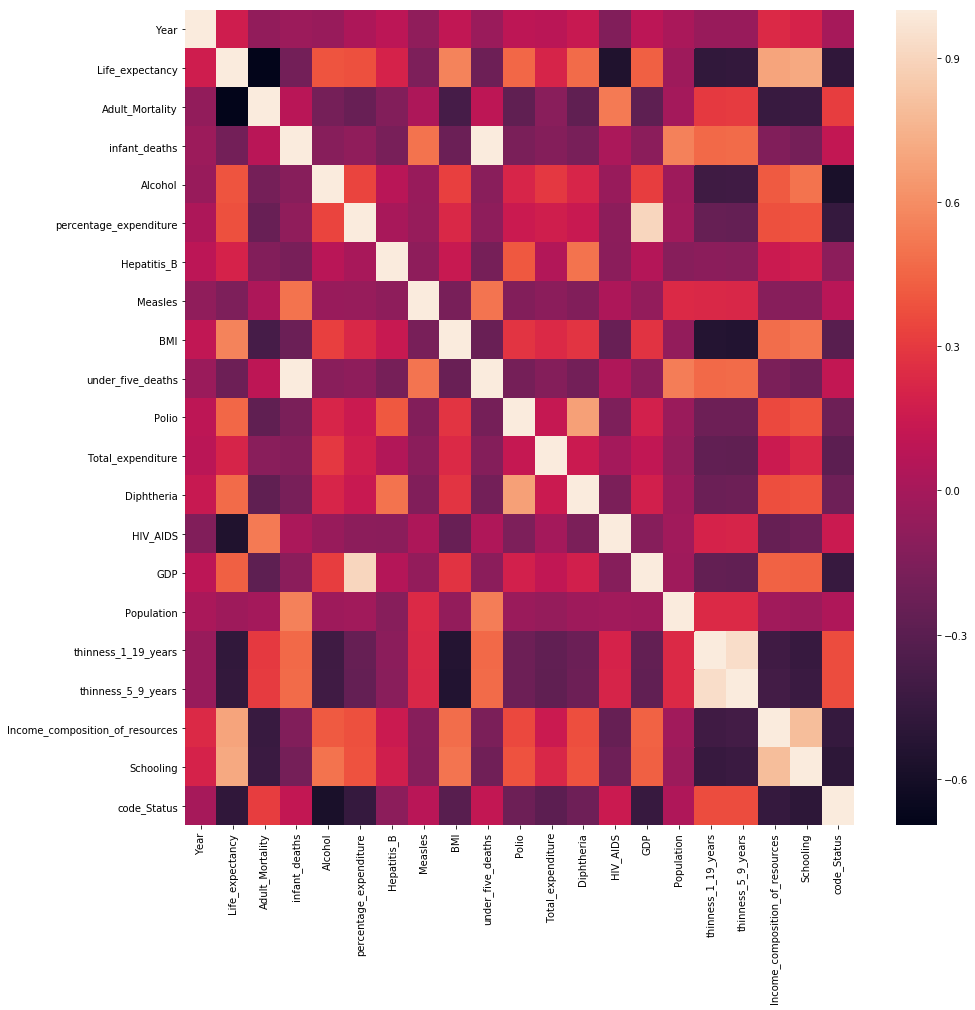

In [ ]:
# Correlation

plt.figure(figsize=(15,15))
sns.heatmap(norm_data.corr())
plt.show()

In [ ]:
# Graphical Visualization

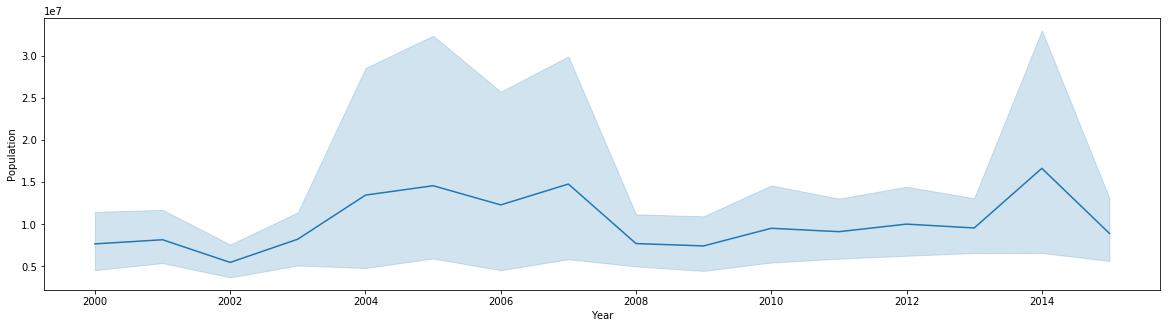

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(x="Year",y='Population', data = data)
plt.show()

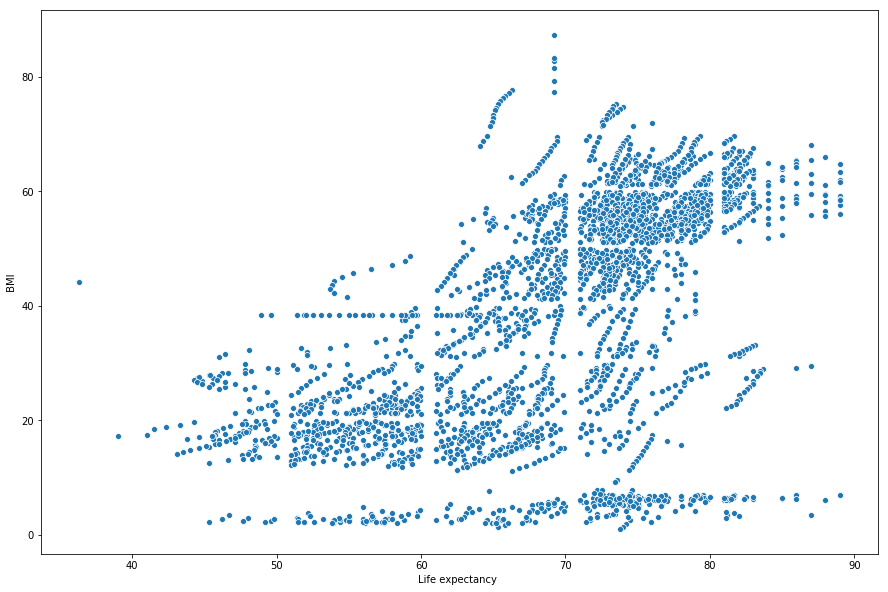

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="Life expectancy ", y=' BMI ', data = data )
plt.show()

##### Conclusion : It can be conclude that, As BMI rate is increases then life expectancy also increases.

### <a id="homo">Assumptions of Linear Regression</a>

###### 1. Linear Relationship (Scatter Plot)
###### 2. Normal Distribution of Residuals (Distribution Plot & Q-Q Plot)
###### 3. Multicollinearity (Correlation Matrix, Tolerance & VIF)
###### 4. Auto-Correlation (DW Test)
###### 5. Homoscedasticty (Breush Pagen Test, White Test)

#### 1. Linear Relationship

<Figure size 144000x144000 with 0 Axes>

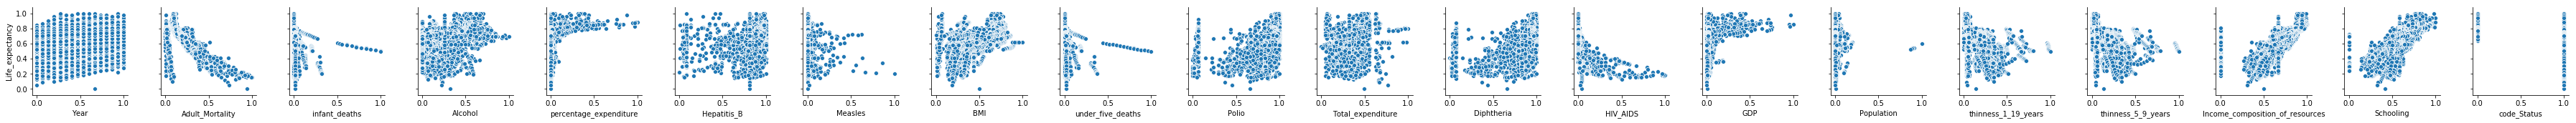

In [ ]:
plt.figure(figsize=(2000,2000))
sns.pairplot(data = norm_data , x_vars = ['Year', 'Adult_Mortality', 'infant_deaths',
       'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV_AIDS', 'GDP', 'Population', 'thinness_1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling',
       'code_Status'] , y_vars = 'Life_expectancy')
plt.show()

##### Conclusion : From above graph we can say that, our dependent variable life expectancy is linear relationship with adult mortality, income composition of resources and schooling

#### 2. Normal Distribution of Residual

Text(0, 0.5, 'Frequency')

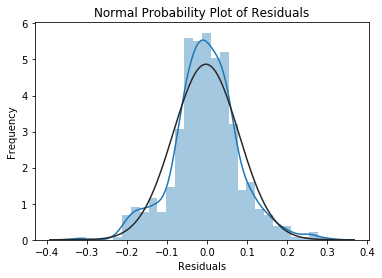

In [ ]:
# Distribution Plot

x = norm_data.drop('Life_expectancy', axis=1)
y = norm_data[["Life_expectancy"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

## training model
model = LinearRegression()

model.fit(x_train, y_train)

## making predictions
y_pred = model.predict(x_test)

residual = y_test - y_pred

## plot
sns.distplot(residual, fit = norm)
plt.title("Normal Probability Plot of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

<Figure size 2160x2160 with 0 Axes>

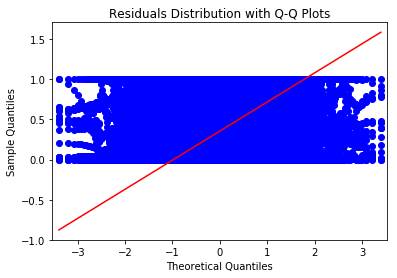

In [ ]:
# Q-Q Plot

plt.figure(figsize=(30,30))
sm.qqplot(norm_data, line = 's')
py.title("Residuals Distribution with Q-Q Plots")
py.show()

##### Conclusion : From Normal distribution plot, we can say that our data is normally distributed

#### 3. Multicollinearity

In [ ]:
norm_data.corr()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,...,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,code_Status
Year,1.000000,0.169623,-0.079535,-0.037415,-0.048168,0.031400,0.089398,-0.082493,0.108327,-0.042937,...,0.081860,0.133853,-0.139741,0.091480,0.014027,-0.047592,-0.050627,0.236333,0.203471,0.001864
Life_expectancy,0.169623,1.000000,-0.696326,-0.196535,0.391598,0.381791,0.203771,-0.157574,0.559255,-0.222503,...,0.207981,0.475418,-0.556457,0.430895,-0.028845,-0.472162,-0.466629,0.692483,0.715066,-0.481962
Adult_Mortality,-0.079535,-0.696326,1.000000,0.078890,-0.189921,-0.242628,-0.138462,0.031293,-0.382143,0.094280,...,-0.111385,-0.273020,0.523886,-0.281434,-0.005292,0.300259,0.305761,-0.440143,-0.434756,0.314894
infant_deaths,-0.037415,-0.196535,0.078890,1.000000,-0.113812,-0.085612,-0.178783,0.501128,-0.227220,0.996629,...,-0.126564,-0.175156,0.025231,-0.102829,0.551667,0.465590,0.471228,-0.143663,-0.191757,0.112252
Alcohol,-0.048168,0.391598,-0.189921,-0.113812,1.000000,0.339634,0.075447,-0.051055,0.318070,-0.110777,...,0.294898,0.215242,-0.048650,0.312579,-0.027341,-0.416946,-0.405881,0.416099,0.497546,-0.579371
percentage_expenditure,0.031400,0.381791,-0.242628,-0.085612,0.339634,1.000000,0.011679,-0.056596,0.228537,-0.087852,...,0.173414,0.143570,-0.097857,0.901819,-0.016888,-0.251190,-0.252725,0.380374,0.388105,-0.454261
Hepatitis_B,0.089398,0.203771,-0.138462,-0.178783,0.075447,0.011679,1.000000,-0.090317,0.134929,-0.184413,...,0.050084,0.499958,-0.102405,0.058775,-0.119805,-0.105144,-0.108334,0.150992,0.171755,-0.095642
Measles,-0.082493,-0.157574,0.031293,0.501128,-0.051055,-0.056596,-0.090317,1.000000,-0.175925,0.507809,...,-0.104569,-0.141861,0.030899,-0.069253,0.237188,0.224742,0.221007,-0.115764,-0.122609,0.076955
BMI,0.108327,0.559255,-0.382143,-0.227220,0.318070,0.228537,0.134929,-0.175925,1.000000,-0.237586,...,0.231814,0.281059,-0.243548,0.275231,-0.069700,-0.532025,-0.538911,0.479837,0.508105,-0.310873
under_five_deaths,-0.042937,-0.222503,0.094280,0.996629,-0.110777,-0.087852,-0.184413,0.507809,-0.237586,1.000000,...,-0.128269,-0.195651,0.038062,-0.106093,0.539260,0.467626,0.472099,-0.161533,-0.207111,0.115195


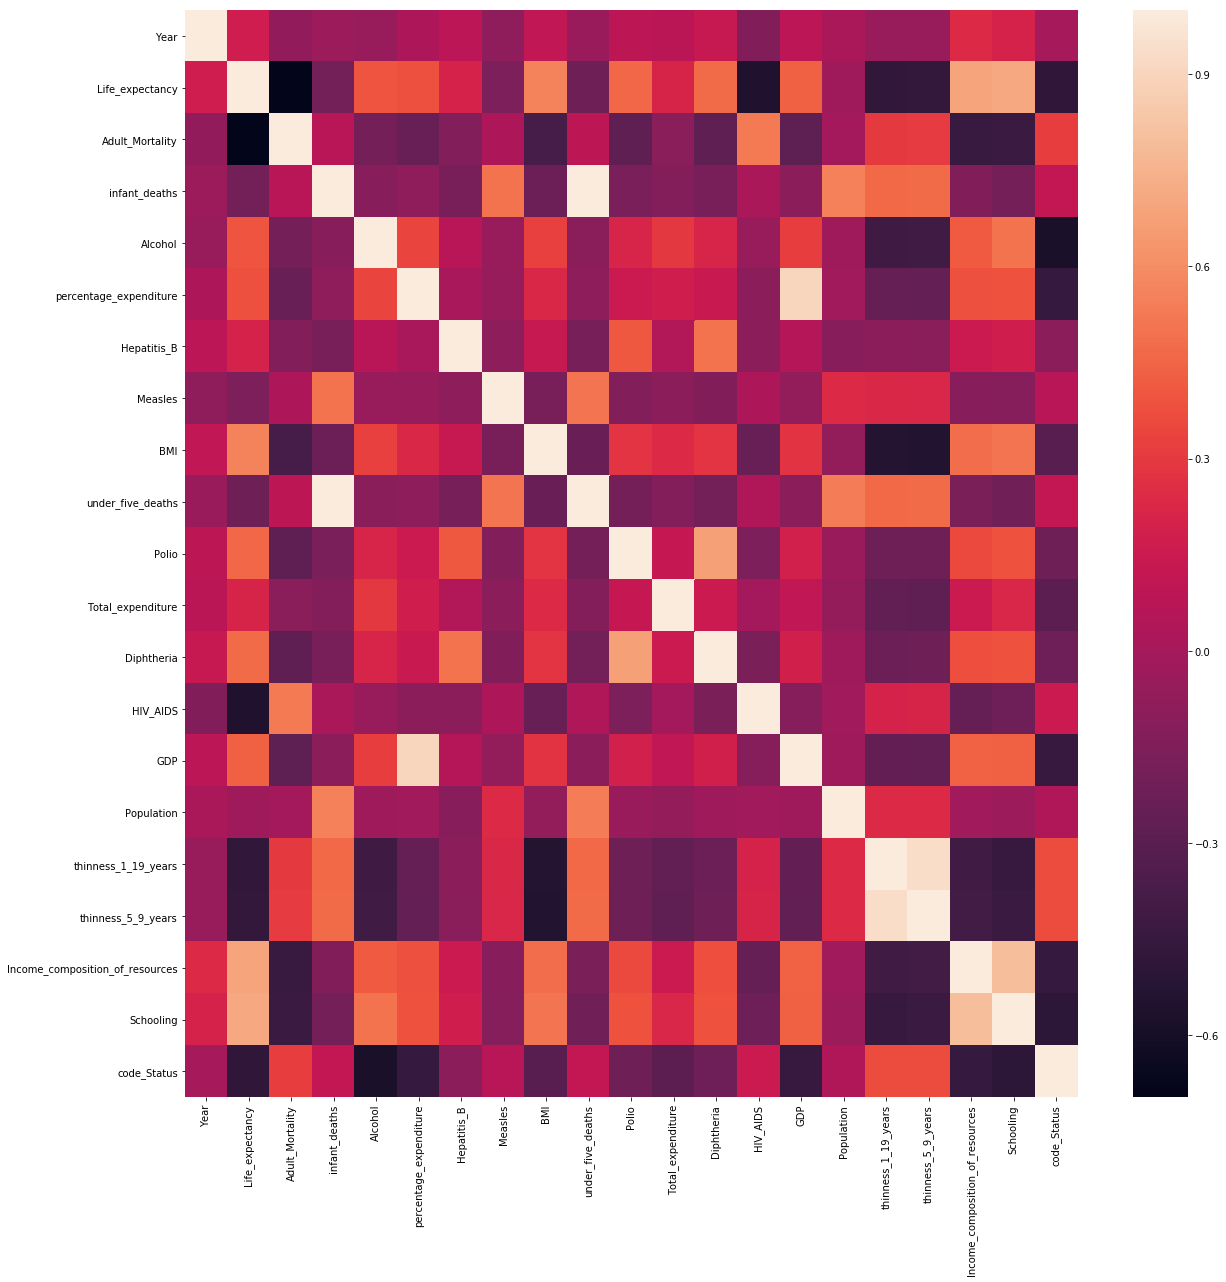

In [ ]:
# Correlation Matrix

plt.figure(figsize=(20,20))
sns.heatmap(norm_data.corr())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X = norm_data[['Year', 'Adult_Mortality', 'infant_deaths',
       'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV_AIDS', 'GDP', 'Population', 'thinness_1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling',
       'code_Status']]
 
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(norm_data.values, i) for i in range(norm_data.shape[1])]
 
vif["features"] = norm_data.columns
 
print(vif)

    VIF Factor                         features
0     4.201961                             Year
1    54.078169                  Life_expectancy
2     4.557461                  Adult_Mortality
3   187.064182                    infant_deaths
4     4.424841                          Alcohol
5     6.599431           percentage_expenditure
6    17.862768                      Hepatitis_B
7     1.438734                          Measles
8     7.989494                              BMI
9   186.352593                under_five_deaths
10   24.832889                            Polio
11    7.332683                Total_expenditure
12   28.495787                       Diphtheria
13    1.932547                         HIV_AIDS
14    7.518577                              GDP
15    1.543287                       Population
16   18.823160              thinness_1_19_years
17   18.859818               thinness_5_9_years
18   32.854252  Income_composition_of_resources
19   52.105504                        Sc

##### Conclusion : IF VIF <= 4 then no multicollinearity. and VIF >= 10 then high multicollinearity.
In our dataset, we found no multicollinearity in Measles,HIV_AIDS and Population.
also we found partial multicollinearity in Year, Adult_mortality, Alcohol, Precentage_expectationBMI, Total_expenditure, GDP and code_status.
and we found high multicollinearity in remaining variables

#### 4. Auto-Correlation

A Durbin Watson test uses the following null and alternative hypotheses:

##### Null hypothesis (H0): First-order autocorrelation does not exist.

##### Alternative hypothesis: (Ha): First-order autocorrelation exists.

In [ ]:
## Importing statsmodels
from statsmodels.stats.stattools import durbin_watson

In [ ]:
dw = durbin_watson(norm_data)
dw

# if dw = 2 ; No Auto_correlation.  if 0<dw>2 ; Positive Autocorrelation.  if 2<dw>4 ; Negative Autocorrelation.

array([0.18885876, 0.01216237, 0.25909231, 0.12021034, 0.0876376 ,
       0.77663551, 0.08485055, 0.72079371, 0.14570011, 0.12331531,
       0.08019786, 0.09476775, 0.07680314, 0.10686001, 0.67016856,
       0.83168745, 0.09442427, 0.09896936, 0.02531864, 0.014396  ,
       0.01896125])

##### Conclusion : when DW is near to 2 then No Autocorrelation, when DW between 0 to 2 then Positive Autocorrelation, when DW between 2 to 4 then Negative Autocorrelation.

so from above Dw values, we can say that; Positive Autocorrelation present in our dataset

#### 5. Homoscedasticity

A Breusch-Pagan test uses the following null and alternative hypotheses:

##### Null hypothesis (H0): Homoscedasticity is present.

##### Alternative hypothesis: (Ha): Homoscedasticity is not present (i.e. heteroscedasticity exists)

In [ ]:
# Step 1: Fit a multiple linear regression model.

import statsmodels.formula.api as smf

#fit regression model
fit = smf.ols('Life_expectancy  ~Year+Adult_Mortality+infant_deaths+Alcohol+percentage_expenditure+Hepatitis_B+Measles+BMI+under_five_deaths+Polio+Total_expenditure+Diphtheria+HIV_AIDS+GDP+Population+thinness_1_19_years+thinness_5_9_years+Income_composition_of_resources+Schooling+code_Status', data = norm_data).fit()

#view model summary
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     664.0
Date:                Sun, 04 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:14:08   Log-Likelihood:                 3381.4
No. Observations:                2938   AIC:                            -6721.
Df Residuals:                    2917   BIC:                            -6595.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [ ]:
# Step 2: Perform a Breusch-Pagan test.

from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(fit.resid, fit.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 373.3881247042711),
 ('p-value', 6.630491025933691e-67),
 ('f-value', 21.23465874610685),
 ('f p-value', 6.151516843301285e-72)]

##### Conclusion : The Lagrange multiplier statistic for the test is 373.3881247042698 and the corresponding p-value is 6.630491025937864e-67. Because this p-value is less than 0.05, we reject the null hypothesis. We have sufficient evidence to say that heteroscedasticity is present in the regression model.

### <a id="homo">Perform Linear Regression</a>

In [ ]:
x.head()

,Year,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,code_Status
0,1.000000,0.362881,0.034444,0.0,0.003659,0.653061,0.005439,0.209733,0.0332,0.031250,0.452118,0.649485,0.0,0.004889,0.026074,0.619565,0.603509,0.505274,0.487923,1.0
1,0.933333,0.373961,0.035556,0.0,0.003774,0.622449,0.002319,0.203940,0.0344,0.572917,0.453279,0.618557,0.0,0.005127,0.000253,0.630435,0.610526,0.502110,0.483092,1.0
2,0.866667,0.369806,0.036667,0.0,0.003759,0.642857,0.002027,0.198146,0.0356,0.614583,0.450377,0.639175,0.0,0.005287,0.024525,0.637681,0.617544,0.495781,0.478261,1.0
3,0.800000,0.375346,0.038333,0.0,0.004014,0.673469,0.013135,0.192352,0.0372,0.666667,0.473012,0.670103,0.0,0.005608,0.002857,0.644928,0.628070,0.488397,0.473430,1.0
4,0.733333,0.379501,0.039444,0.0,0.000364,0.683673,0.014200,0.187717,0.0388,0.677083,0.435287,0.680412,0.0,0.000519,0.002302,0.655797,0.635088,0.478903,0.458937,1.0


In [ ]:
y.head()

,Life_expectancy
0,0.544592
1,0.447818
2,0.447818
3,0.440228
4,0.434535


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
model_1_train_R_sq = model.score(x_train, y_train)
model_1_train_R_sq

0.8258583485093302

In [ ]:
model_1_test_R_sq = model.score(x_test, y_test)
model_1_test_R_sq

0.7936542186155426

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
model.coef_

array([[-2.50697169e-03, -2.75690024e-01,  3.47837630e+00,
         2.83564764e-02, -4.21012114e-03, -3.08898033e-02,
        -9.10800074e-02,  6.21305047e-02, -3.62508061e+00,
         4.55612524e-02,  3.60519172e-02,  8.22613841e-02,
        -4.75625231e-01,  1.00237486e-01,  1.18178123e-02,
        -3.55103023e-02, -6.70018323e-03,  1.20799922e-01,
         2.42527695e-01, -2.47077120e-02]])

In [ ]:
model.intercept_

array([0.38189847])

In [ ]:
pd.DataFrame(model.coef_.flatten(), x.columns, columns = ['Coeff'])

,Coeff
Year,-0.002507
Adult_Mortality,-0.275690
infant_deaths,3.478376
Alcohol,0.028356
percentage_expenditure,-0.004210
Hepatitis_B,-0.030890
Measles,-0.091080
BMI,0.062131
under_five_deaths,-3.625081
Polio,0.045561


In [ ]:
residual = y_test - y_pred

residual.mean()

Life_expectancy    0.003481
dtype: float64

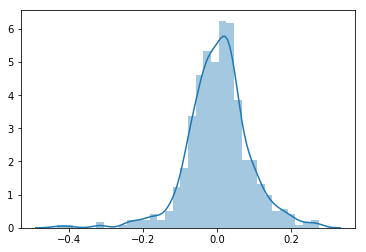

In [ ]:
sns.distplot(residual, kde = True)
plt.show()

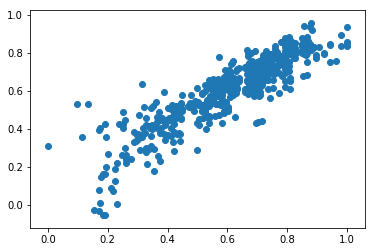

In [ ]:
plt.scatter(y_test, y_pred)
plt.show()

#### In this Multiple Linear Regression our Training score is 0.82 and Testing score is 0.82. 

#### Now we have to increase our Accuracy

In [ ]:
x = norm_data[['Adult_Mortality','Polio','Diphtheria','HIV_AIDS','GDP','Income_composition_of_resources','Schooling']]
x.head()

,Adult_Mortality,Polio,Diphtheria,HIV_AIDS,GDP,Income_composition_of_resources,Schooling
0,0.362881,0.031250,0.649485,0.0,0.004889,0.505274,0.487923
1,0.373961,0.572917,0.618557,0.0,0.005127,0.502110,0.483092
2,0.369806,0.614583,0.639175,0.0,0.005287,0.495781,0.478261
3,0.375346,0.666667,0.670103,0.0,0.005608,0.488397,0.473430
4,0.379501,0.677083,0.680412,0.0,0.000519,0.478903,0.458937


In [ ]:
y.head()

,Life_expectancy
0,0.544592
1,0.447818
2,0.447818
3,0.440228
4,0.434535


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
model_2_train_R_sq = model.score(x_train, y_train)
model_2_train_R_sq

0.792432430064097

In [ ]:
model_2_test_R_sq = model.score(x_test, y_test)
model_2_test_R_sq

0.7891221788127145

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
model.coef_

array([[-0.2976797 ,  0.05567682,  0.08640369, -0.4806264 ,  0.13199496,
         0.14524231,  0.33610604]])

In [ ]:
model.intercept_

array([0.29140347])

In [ ]:
pd.DataFrame(model.coef_.flatten(), x.columns, columns = ['Coeff'])

,Coeff
Adult_Mortality,-0.297680
Polio,0.055677
Diphtheria,0.086404
HIV_AIDS,-0.480626
GDP,0.131995
Income_composition_of_resources,0.145242
Schooling,0.336106


In [ ]:
residual = y_test - y_pred

residual.mean()

Life_expectancy    0.003047
dtype: float64

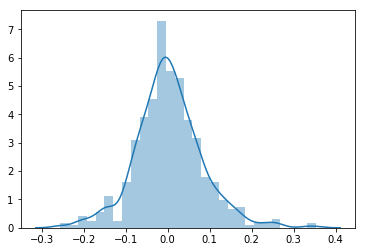

In [ ]:
sns.distplot(residual, kde = True)
plt.show()

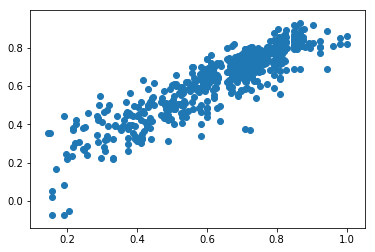

In [ ]:
plt.scatter(y_test, y_pred)
plt.show()

#### In this Multiple Linear Regression our Training score is 0.79 and Testing score is 0.79

In [ ]:
pd.DataFrame({"Model 1":[model_1_train_R_sq, model_1_train_R_sq], "Model 2":[model_2_train_R_sq,model_2_test_R_sq]}, index = ['Training_R_sq','Testing_R_sq'])

,Model 1,Model 2
Training_R_sq,0.825858,0.792432
Testing_R_sq,0.825858,0.789122


### Interpretation : From the regression model one, various predicting factors which has been chosen initially really affect the Life Expectancy.